# Milestone 3

### Task 4: Data Analysis

In [20]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pycountry_convert as pc
#As each of us have research questions that revolve around different aspects of the data, we will need all 3 project functions
import project_functions1 as p1
import project_functions3 as p3

### The Research Questions

Research Question #1 (Simone): Is there a correlation between age of an employee in the Tech work industry and them seeking treatment for their mental health issues

Research Question #2 (Soren): Does Country Of Origin Affect Family History Of Mental Illness?

Research Question #3 (Eveline): Is there a significant age and gender disparity in the mental health of tech employees?

---

### Research Question #1 (Simone)

Creating a dataframe that's best for Simone's research question, is there a correlation between age of an employee in the Tech work industry and them seeking treatment for their mental health issues?

[Table of Generations](https://www.careerplanner.com/Career-Articles/Generations.cfm)

- Boomer: 52 and higher
- Gen X: 37 - 51
- Millennial: 20 - 36
- Gen Z/Zoomer: 19 and lower

In [43]:
load_df = pd.read_csv('../data/raw/dataRaw.csv')
proj_df = p1.load_and_process(load_df)

#creating a new column that labels the age generation of the tech worker
def label_age (row):
   """Takes the number in the Age column, and if that age is in a certain range, what is returned in the new column is the name of that generation."""
   if row['Age'] >= 52:
      return 'Boomer'
   if row['Age'] >= 37 and row['Age'] <= 51:
      return 'Gen X'
   if row['Age'] >= 20 and row['Age'] <= 36:
      return 'Millennial'
   if row['Age'] <= 19:
      return 'Gen Z'

proj_df['age_label'] = proj_df.apply(lambda row: label_age(row), axis=1)

proj_df.head(5)

,Age,treatment,coworkers,supervisor,age_label
0,37,Yes,Some of them,Yes,Gen X
1,44,No,No,No,Gen X
2,32,No,Yes,Yes,Millennial
3,31,Yes,Some of them,No,Millennial
4,31,No,Some of them,Yes,Millennial


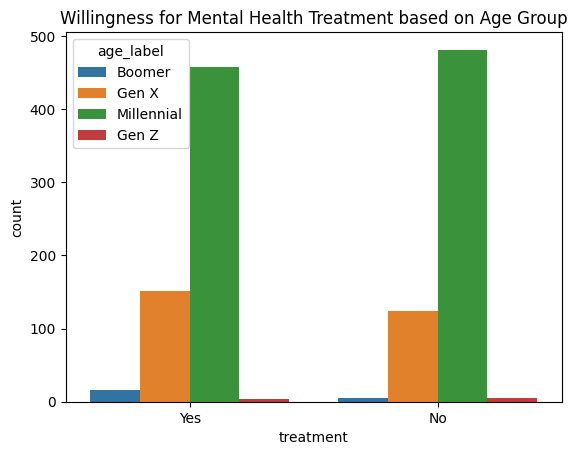

In [44]:
hue_order = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']

sns.countplot(x='treatment', data=proj_df, hue='age_label', hue_order=hue_order).set(title='Willingness for Mental Health Treatment based on Age Group')
plt.show()

Figure 1: In the above countplot, it shows the willingness of tech workers to get treatment for their mental health issues, divided by their age class. Both Boomers and Gen X employees are more likely to get treatment for their mental health than Millennials and Gen Z employees.

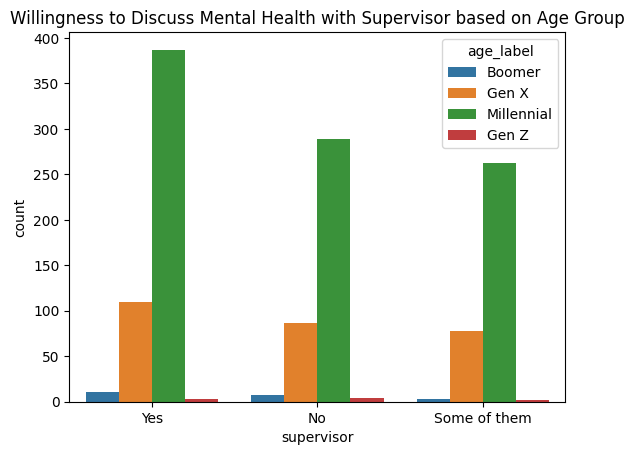

In [22]:
sns.countplot(x='supervisor', data=proj_df, hue='age_label', hue_order=hue_order).set(title='Willingness to Discuss Mental Health with Supervisor based on Age Group')
plt.show()

Figure 2: The above countplot reveals a tech worker's willingness to discuss mental health issues with their supervisors, separated by age generations. Boomers, Gen X, and Millennials answered 'Yes' more than the other answers, while Gen Z answered 'No' more times than the other answers.

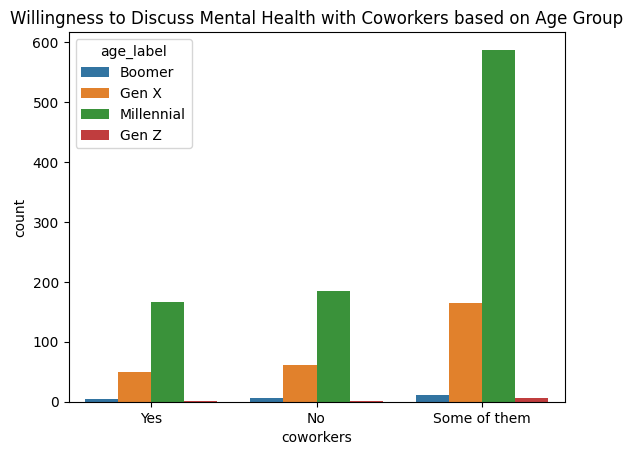

In [23]:
orderedList = list(proj_df['coworkers'].sort_values().unique())
orderedList.remove('Yes')
orderedList.insert(0,'Yes')
sns.countplot(x='coworkers', data=proj_df, hue='age_label', hue_order=hue_order, order=orderedList).set(title='Willingness to Discuss Mental Health with Coworkers based on Age Group')
plt.show()

Figure 3: The above countplot illustrates a tech worker's willingness to discuss mental health issues with their coworkers, separated by age generations. What is shown is that all age generations answered 'Some of them' the most, and 'Yes' the least.

#### Conclusion

Overall, it seems that there is no significant correlation between the age of a tech worker and their willingness to seek treatment for or discuss mental health issues. In fact, it seems that Boomers and Gen X workers are more likely to seek treatment than Millennials and Gen Z which contradicts my expectations. Gen Z workers also appear less likely to discuss mental health issues with their supervisor than other generations. While this may be a trend for Gen Z tech employees, it may also be a result of not having enough Gen Z tech workers answer the survey. The same can be said for Boomer workers. Overall, this was an enlightening analysis showing that while the survey was conducted, there is no evidence that older generations are more stigmatized against mental health issues than younger generations.

---